# Lab 12: Tuning an instrument 

<font size="3"> Last updated 8/13/24 </font>

## <span style="color:orange;"> 00. Content </span>

<font size="5"> Mathematics </font>
- N/A
    
<font size="5"> Programming Skills </font>
- Working with Functions and Classes
- Loops
- FFT function from numpy

## <span style="color:orange;"> 0. Required Hardware </span>
- N/A

<h3 style="background-color:lightblue"> Write your name and email below: </h3>

**Name:** me 

**Email:** me @purdue.edu

## <span style="color:orange;"> 1. Introduction </span>

An instrument tuner is a device that helps musicians and music enthusiasts tune their musical instruments accurately. It helps the user identify the precise pitch of each note to make sure the music being played is in tune.

It can be a standalone device, an app on a phone or tablet, or built into an instrument. The tuner works by detecting the frequency of a note and indicating whether it is too high, too low, or in tune. This is commonly done through a display that shows a needle or lights that move to indicate the correct pitch.

For example, If a guitarist wants to tune their guitar using a tuner, they would play each string, one at a time, while looking at the tuner screen. The tuner would display the note being played, and the musician would tweak the tuning pegs on their guitar until the note displayed on the tuner matches the correct note for that string.

Today we will work on building our own instrument tuner using Python.


But before we begin, let us explore the concept of functions in python.



## <span style="color:orange;"> 2. Functions in Python</span>

Throughout the duration of the course, we have written a couple of hundred lines of code. In the last couple of labs, you might have copy pasted or rewrote several lines repeatedly for plotting and labeling ffts of different signals. Using functions is a clever way to reuse parts of code and to avoid code repetition.

Now let us look at an example.

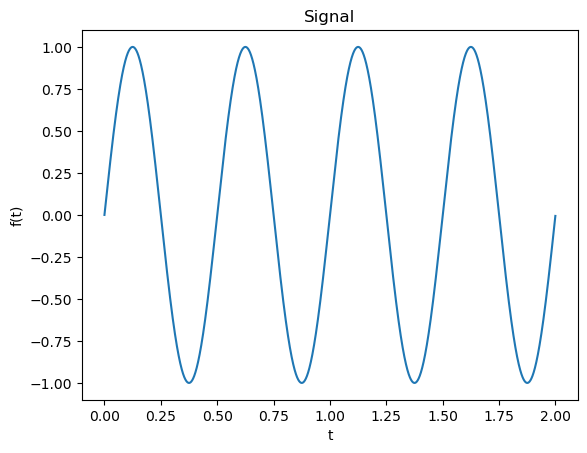

In [11]:
# Note imports of a function need not be called repeatedly and as such are written at the top outside of the function
import numpy as np
import matplotlib.pyplot as plt

def sine_wave_generator(frequency, sampling_rate = 2100, duration = 2):
    
    sampling_period = 1/sampling_rate
    t = np.arange(0, duration, sampling_period) 
    y = np.sin(2 * np.pi * frequency * t)
    
    plt.plot(t, y)
    plt.title('Signal')
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.show()



sine_wave_generator(2)

In the code snippet above, we are using `sine_wave_generator` function to generate different sinewaves without repeating that particular code block. Now I can just use this one line of code to generate and plot the sinewaves of different frequencies and sampling rates instead of the original 8 lines.

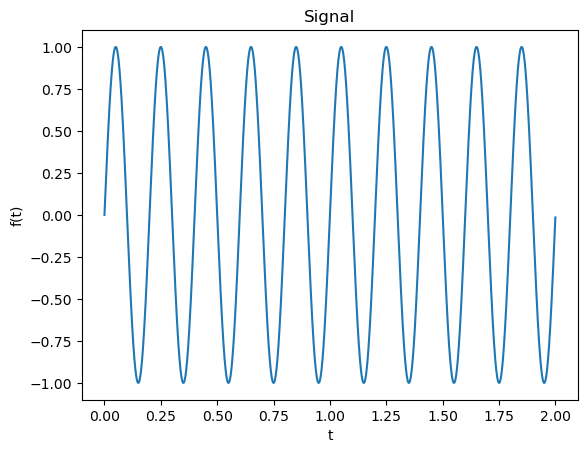

In [9]:
sine_wave_generator(5) #here 5 is the frequency.

The first line of the function is called function definition.
If you look at the function definition of our sine-wave generator,
`def sine_wave_generator(frequency, t, sampling_rate = 2100, duration = 2)` it is taking 3 values as input -frequency, duration and sampling_rate. As you can see we have have only used one parameter in the function call. This is because we have given the default values of those arguments inside the function call. If we have default values specified, python will use these default values in the absence of corresponding arguments in the function call.

### <span style="color:red"> Exercise 1</span>

Plot a sine-wave with frequency 10Hz of duration 1 second with a sampling rate of 5000 samples/sec using `sine_wave_generator`

## <span style="color:orange;"> 2. Components of an Instrument Tuner </span>

An instrument tuner typically consists of the following components:

1. Audio Input: This is the part of the tuner used to gather the sound played by the source. It can be a built-in microphone or an input jack for connecting an instrument cable.

2. Display screen: This is where the tuner displays information about the note being played, such as whether it's sharp or flat.

3. Tuning mode selector: This allows the user to select the tuning mode they want to use, such as standard tuning for guitar or chromatic tuning for any instrument.

4. Calibration knob: This allows the user to adjust the tuning of the tuner to match other tuning sources, such as a piano or another instrument.

5. LEDs or meters: These provide visual feedback to indicate whether a note is in tune or not. LEDs may light up green when a note is in tune, while meters may show a centered needle or a digital readout.

Overall, the components of an instrument tuner work together to accurately measure the pitch of a note played on an instrument and visually display whether it's in tune or not.

Now lets us work on building each individual components of the the tuner using python.

#### <span style="color:blue"> 2.1. Audio Input</span>

We have already worked on an building an [voice_recorder.py](https://github.com/TheDataScienceLabs/DSLab_Fourier/blob/main/book/labs/modulation/tremolo_beats/voice_recorder.py) using [PyAudio](https://people.csail.mit.edu/hubert/pyaudio/docs/) and Python which can be used as our Audio Input. Since we will be using the audio recorder repeatedly, it is wise to rewrite it as a function, so that it can be reused easily as and when required. However we need to make several changes to the voice recorder to adapt it as the input to our instrument tuner.



### <span style="color:red"> Exercise 2</span>

- The current implementation of [voice_recorder.py](https://github.com/TheDataScienceLabs/DSLab_Fourier/blob/main/book/labs/modulation/tremolo_beats/voice_recorder.py) saves the recording as a wav file. Rewrite [voice_recorder.py](https://github.com/TheDataScienceLabs/DSLab_Fourier/blob/main/book/labs/modulation/tremolo_beats/voice_recorder.py) as a function which returns the recording as a numpy array or a list.
- Name the function as `get_recordings()`

#### <span style="color:blue"> 2.2. Display</span>
Since we are using Python to make our instrument tuner, we can use our output console as a display.

#### <span style="color:blue"> 2.3. Mode Selectors and Other Inputs</span>
We could use some keyboard inputs to give inputs to our instrument tuner.
`input()` function is used to give user inputs to a python program.

#### <span style="color:blue"> 2.4. Identifying the frequency and Note for tuning</span>
One of the important pieces required to build an instrument tuner is a module which identifies the frequency from the input.
As we have learned in the last lab few labs, we could use an fft to analyze the frequencies in an input signal.

### <span style="color:red"> Exercise 3</span>

- Write a function `get_frequency(input_audio)` which returns the most dominant frequency in input_audio.

## <span style="color:orange;"> 3. Instrument Tuner </span>

Combining the different modules explained above, I have implemented a sample instrument tuner, [tuner.py](https://github.com/TheDataScienceLabs/DSLab_Fourier/blob/main/book/labs/analysis/instrument_tuning/tuner.py).

If you haven't used object oriented programming in python, review online before looking at tuner.py. 
- https://realpython.com/python3-object-oriented-programming/ is a good place to start. 

Let us go through the implementation.

```
    def open_stream_for_tuning(self):
        
        p = pyaudio.PyAudio()

        stream = p.open(format = self.FORMAT,
                    channels = self.CHANNELS,
                    rate = self.RATE,
                    input = True,
                    frames_per_buffer = self.chunk)

        return p, stream

```
The function `open_stream_for_tuning(self)` is used for opening an input audio stream using [PyAudio](https://people.csail.mit.edu/hubert/pyaudio/docs/). This function returns the pyaudio object and the newly opened audio stream.

```
    def close_audio_stream(self, p, stream):

            stream.stop_stream()
            stream.close()
            p.terminate()

```

As the name indicates `close_audio_stream(self, p, stream)` is used for closing and terminating the stream as soon as the tuning process ends.

```
    def program_info(self):

        print('*'*80)

        info = ["This is a simple program used for tuning an instrument.", "\n","Usage:", "Play a note on seeing a prompt."]
        info.append("The program will analyze the note played and display the frequency of the note.")
        info.append("Follow the promts to redo the tuning or to exit the program")

        for line in info:
            print(line)

        print('*'*80)

```

The function `def program_info(self)` is used to give some useful information about the function and usage instructions to the users upon program startup.

```
    def get_recorded_frames(self, stream):

        frames = list()

        for i in range(0, self.RATE//self.chunk * self.RECORD_SECONDS):

            data = stream.read(self.chunk, exception_on_overflow = False)
            data_length = len(data)//self.swidth

            frame = wave.struct.unpack("%dh"%(data_length), data)
            frames.extend(list(frame))

        return frames
```
The function `def get_recorded_frames(self, stream)` is a clean implementation of the voice recorder, which takes in a stream object. This input audio stream object is used to record frames of audio. The recorded audio is then converted to integers and appended to a list which is then returned back.

```
    def find_max_freq(self, frames):

        fft = np.fft.fft(frames)
        xf = np.fft.fftfreq(len(frames), 1/self.RATE)
        mag = np.abs(fft)
        idx = np.argmax(mag)
        freq = xf[idx]

        return np.abs(freq)
```

The function `ind_max_freq(self, frames)` is used to find the dominant frequency in the input signal - frames.

```
def tune(self):

        
        user_input = ''

        while user_input != 'q':

            print("Tuner starts in 3 seconds! Get ready to play the note.")

            for i in range(4, 0, -1):
                print(i, end = '\r')
                sleep(1)

            p, stream = self.open_stream_for_tuning()
            print("*************************************")
            print("*******    tuning started!    *******")


            #get recordings as a numpy array
            frames = np.array(self.get_recorded_frames(stream))

            # identify dominant frequency for tuning.
            freq = self.find_max_freq(frames)

            print("*************************************")
            print("Frequency: ", freq)
            print("*************************************")
            self.close_audio_stream(p, stream)

            self.show_menu()
            user_input = input("Enter your choice: ")


            if (user_input == 'q' or user_input == 'Q'):
                break

        print("*******    tuning stopped!    *******")
        print("*************************************")


        self.close_audio_stream(p, stream)

```

Finally the tune function combines the individual building blocks explained above to make our instrument tuner.
It creates an audio stream using the `open_stream_for_tuning(self)` function, gets the recording from `get_recorded_frames(stream)`, finds and displays the `find_max_freq(self, frames)` the dominant frequency in the instrument for tuning and finally terminates the stream on completing the tuning process.

The individual functions of the instrument tuner are encapsulated inside a class-Tuner.

### <span style="color:red"> Exercise 4</span>

- Run [tuner.py](https://github.com/TheDataScienceLabs/DSLab_Fourier/blob/main/book/labs/analysis/instrument_tuning/tuner.py).
- You can use a audio tune generator app in your mobile or a even play a tone using Audio function to test the tuner.
- Report your observations.

### <span style="color:red"> Exercise 5</span>

- The program [tuner.py](https://github.com/TheDataScienceLabs/DSLab_Fourier/blob/main/book/labs/analysis/instrument_tuning/tuner.py) returns the frequencies.
- Modify the program to receive a target note as an input eg. 'C' or 'C#'
- Instead of frequencies, it should return the frequency difference between target note and actual freqeuncy.
- Add the modified code along with your submission.

## <span style="color:green;"> Reflection </span>

Do not skip this section! Lab will be graded only on completing this section.

1. What parts of the lab, if any, do you feel you did well? <br>
2. What are some things you learned today? <br>
3. Are there any topics that could use more clarification? <br>
4. Do you have any suggestions on parts of the lab to improve?

<h3 style="background-color:lightblue"> Write Answers for the Reflection Below </h3>